# Clustering and Title Generation


News articles dataset with 1k documents along with metadata in json format.


In [2]:
#import the basic library
import numpy as np
import pandas as pd
import json
import glob
import pprint
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Here we have 1000 documents as in json format. firstly just merged those file into one common json file

In [ ]:
read_files = glob.glob("./1k_news_articles/*.json")

In [ ]:
output_list=[]

In [ ]:
for f in read_files:
    with open(f,"rb") as infile:
        for line in infile.readlines():
            output_list.append(json.loads(line))

In [ ]:
with open("merged_file.json","w") as outfile:
    json.dump(output_list,outfile)

In [3]:
#read that  particular json file
df=pd.read_json('merged_file.json',lines=True)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,"{'Author': 'Cabe Atwell ', 'Date': '04.05.2021...","{'Author': 'Cabe Atwell ', 'Date': '09.11.2018...","{'Author': 'Philip Spagnoli Stoten, Journalist...","{'Author': 'Hailey Lynne McKeefry ', 'Date': '...","{'Author': 'Cabe Atwell ', 'Date': '10.08.2018...","{'Author': 'Cabe Atwell ', 'Date': '12.17.2018...","{'Author': 'Rick Merritt ', 'Date': '01.03.201...","{'Author': 'EETimes ', 'Date': '11.17.2017', '...","{'Author': 'Cabe Atwell ', 'Date': '03.02.2021...","{'Author': 'Hailey Lynne McKeefry ', 'Date': '...",...,"{'Author': 'Colin Barnden ', 'Date': '04.23.20...","{'Author': 'Gary Hilson ', 'Date': '09.27.2018...","{'Author': 'Gary Hilson ', 'Date': '02.08.2021...","{'Author': 'Sally Ward-Foxton ', 'Date': '10.2...","{'Author': 'Nitin Dahad ', 'Date': '03.22.2021...","{'Author': 'Nitin Dahad ', 'Date': '06.24.2019...","{'Author': 'Gina Roos ', 'Date': '12.03.2019',...","{'Author': 'Bill Schweber ', 'Date': '04.25.20...","{'Author': 'Lauro Rizzatti, consultant ', 'Dat...","{'Author': 'Nitin Dahad ', 'Date': '09.20.2018..."


# the merged json file just want to convert into csv file

In [ ]:
# Opening JSON file and loading the data
# into the variable data
with open('merged_file.json') as json_file:
    data = json.load(json_file)

In [ ]:
fname="output.csv"

In [ ]:
with open(fname,"w",encoding='utf-8') as file:
    csv_file=csv.writer(file)
    csv_file.writerow(['Author','Date','Keywords','Article'])
    for item in data:
        csv_file.writerow([item['Author'],item['Date'],item['Keywords'],item['Article']])

# read the csv file


In [137]:
af=pd.read_csv("output.csv")
af

,Author,Date,Keywords,Article
0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ..."
1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s..."
2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...
3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec..."
4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...
...,...,...,...,...
995,Nitin Dahad,06.24.2019,"Commercial, Internet Of Things, NFC, Packaging...",Chinese packaging materials firm BSN intends...
996,Gina Roos,12.03.2019,NaN,"Thales recently launched PureFlyt, a connect..."
997,Bill Schweber,04.25.2021,"Advanced Technology, Energy, Power",Offshore fixed-in-place wind farms are not ne...
998,"Lauro Rizzatti, consultant",04.30.2021,"CPU, Fpga, GPU, Programmable Logic Tools, Veri...",The 35-year-old field programmable gate array...


In [138]:
af.shape

(1000, 4)

In [139]:
pd.isna(af).sum()

Author        0
Date          0
Keywords    105
Article       0
dtype: int64

# Data cleaning and preprocessing

In [140]:
#stemming,lemmatization are the basic NLP preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [141]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [142]:
corpus = []
for i in range(0, len(af)):
    review = re.sub('[^a-zA-Z]', ' ', af['Article'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the TF-IDF model

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [145]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Clustering

It is an Unsupervised machine learning problem. because it is not labelled .here we have to cluster the news articles into different clusters or groups

 Kmeans Clustering will going to use

In [149]:
from sklearn.cluster import KMeans

In [154]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,50):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

We need to plot a figure to find and choose no.of clusters

we just plotting Elbow Curve

Text(0, 0.5, 'Inertia')

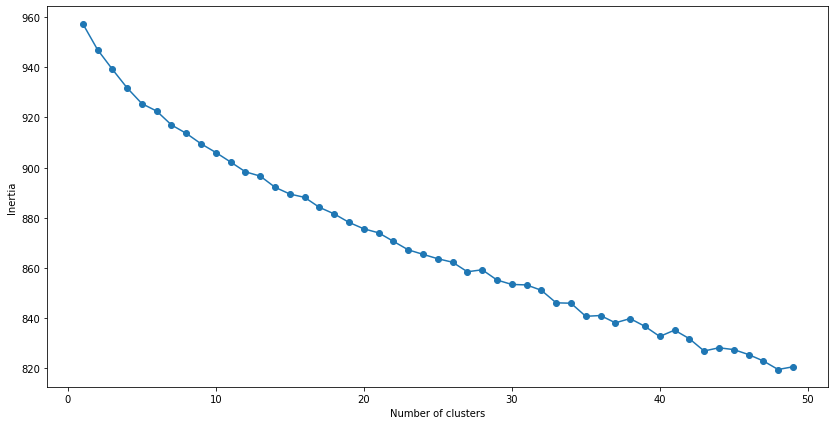

In [155]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(14,7))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [156]:
print(kmeans.inertia_)

820.645967698162


Here, we can choose any number of clusters between 7 and 9. We can have 7,8 or even 9 clusters. You must also look at the computation cost while deciding the number of clusters. If we increase the number of clusters, the computation cost will also increase. 

In [157]:
#choose k=7

# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

In [158]:
af_new=af
af_new['cluster']=pred

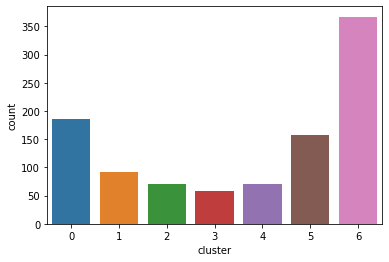

In [159]:
# count plot on single categorical variable
sns.countplot(x ='cluster', data = af_new)
 
# Show the plot
plt.show()

In [160]:
af_new['cluster'].value_counts()


6    367
0    185
5    157
1     91
2     71
4     70
3     59
Name: cluster, dtype: int64

In [161]:
af_new.head()

,Author,Date,Keywords,Article,cluster
0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ...",6
1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s...",6
2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...,6
3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec...",6
4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...,6


In [162]:
#saving the dataframe af_new as csv
af_new.to_csv('af_new.csv')


for the future purpose the  cleaned and preprocressed data [corpus] in convert into dataframe and merged the predicted cluster
for title generation of each and particular cluster



In [163]:
#convert into dataframe
corpus_new=pd.DataFrame(corpus,columns=['Article'])
corpus_new['cluster']=pred
corpus_new.head()


,Article,cluster
0,sbcs single board computer cpu gpus electronic...,6
1,every year like clockwork new breed single boa...,6
2,go la vega last week ce shame well worry quiet...,6
3,today help mass high tech electronics product ...,6
4,engineering skill matter discipline come quite...,6


In [164]:
#saving the dataframe af_new as csv
corpus_new.to_csv('corpus_new.csv')

# Title Generation

for Text generation,here we are using Markov chain generator

Markovify is a simple, extensible Markov chain generator. Right now, its main use is for building Markov models of large corpora of text, and generating random sentences from that

In [10]:
import markovify 

In [33]:
data1=pd.read_csv('corpus_new.csv')
data1.head()

,Unnamed: 0,Article,cluster
0,0,sbcs single board computer cpu gpus electronic...,2
1,1,every year like clockwork new breed single boa...,1
2,2,go la vega last week ce shame well worry quiet...,2
3,3,today help mass high tech electronics product ...,2
4,4,engineering skill matter discipline come quite...,2


In [165]:
#we need the text without lossing the stopwords for better meaning
data2=pd.read_csv('af_new.csv')
data2.head(5)

,Unnamed: 0,Author,Date,Keywords,Article,cluster
0,0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ...",6
1,1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s...",6
2,2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...,6
3,3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec...",6
4,4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...,6


In [166]:
#we need to preprocess the data 
cor2=[]
for i in range(0, len(data2)):
    review = re.sub('[^a-zA-Z]', ' ', data2['Article'][i])
    review = review.lower()
    review = review.split()
    
    #review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    cor2.append(review)


In [167]:
cor2_new=pd.DataFrame(cor2,columns=['Article'])
cor2_new

data2['text']=cor2_new['Article']
data2.head(5)

,Unnamed: 0,Author,Date,Keywords,Article,cluster,text
0,0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ...",6,as with sbcs single board computers cpus gpus ...
1,1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s...",6,every year like clockwork new breeds of single...
2,2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...,6,if you didn t go to las vegas last week for ce...
3,3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec...",6,today with the help of the masses high tech an...
4,4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...,6,having engineering skills no matter the discip...


from the clustering session , we have divided 7 clusters into
[0,1,2,3,4,5,6]

we need to title each clusters from the content as generative usin Markov Chain Generator

# Cluster 1


In [168]:
#intialize the data 
clus0=data2[data2['cluster']==0]['Article']

for better efficient model we will use

Ensembling Markov Chain Model

In [169]:
text_modelA0= markovify.NewlineText(clus0, state_size = 2)
text_modelB0 = markovify.NewlineText(clus0, state_size = 2)
model_combo0 = markovify.combine([ text_modelA0, text_modelB0 ], [ 1.5, 1 ])
print('Title of Cluster1 news articles:',model_combo0.make_short_sentence(150))

Title of Cluster1 news articles:  No longer a sci-fi novelty, artificial intelligence and big data analytics at Lux Research. 


# Cluster 2

In [170]:
#intialize the data 
clus1=data2[data2['cluster']==1]['Article']

In [173]:
text_modelA1 = markovify.NewlineText(clus1, state_size = 2)
text_modelB1 = markovify.NewlineText(clus1, state_size = 2)
model_combo1 = markovify.combine([ text_modelA1, text_modelB1 ], [ 1.5, 1 ])
print('Title of Cluster2 news articles:',model_combo1.make_short_sentence(280))

Title of Cluster2 news articles:  One of the sessionâs speakers and a technical marketing manager for autonomous capabilities requires the energy and infrastructure only found in vehicles. For more information visit www.airbiquity.com â Alix Paultre is a director of technology for the SEMI trade group 


# Cluster 3

In [174]:
#intialize the data 
clus2=data2[data2['cluster']==2]['Article']

In [175]:
text_modelA2 = markovify.NewlineText(clus2, state_size = 2)
text_modelB2 = markovify.NewlineText(clus2, state_size = 2)
model_combo2 = markovify.combine([ text_modelA2, text_modelB2 ], [ 1.5, 1 ])
print('Title of Cluster2 news articles:',model_combo2.make_short_sentence(200))

Title of Cluster2 news articles:  SAN JOSE, Calif.Â â China has three systems in the technology community, they are closely intertwined. David Yang, ZGMicro 


# Cluster 4

In [176]:
#intialize the data 
clus3=data2[data2['cluster']==3]['Article']

In [177]:
text_modelA3 = markovify.NewlineText(clus3, state_size = 2)
text_modelB3 = markovify.NewlineText(clus3, state_size = 2)
model_combo3 = markovify.combine([ text_modelA3, text_modelB3], [ 1.5, 1 ])
print('Title of Cluster2 news articles:',model_combo3.make_short_sentence(250))

Title of Cluster2 news articles:  Itâs not surprising the historically huge bid should be rebuffed. As Hock Tan may get both. â Rick Merritt, Silicon Valley Bureau Chief, EE Times 


# Cluster 5

In [178]:
#intialize the data 
clus4=data1[data1['cluster']==4]['Article']

In [179]:
text_modelA4 = markovify.NewlineText(clus4, state_size = 2)
text_modelB4 = markovify.NewlineText(clus4, state_size = 2)
model_combo4 = markovify.combine([ text_modelA4, text_modelB4 ], [ 1.5, 1 ])
print('Title of Cluster2 news articles:',model_combo4.make_short_sentence(200))

Title of Cluster2 news articles: san francisco tight supply condition characterized dram chip forecast rise share twitterfacebooklinkedin


# Cluster 6

In [180]:
#intialize the data 
clus5=data1[data1['cluster']==5]['Article']

In [182]:
text_modelA5 = markovify.NewlineText(clus5, state_size = 2)
text_modelB5 = markovify.NewlineText(clus5, state_size = 2)
model_combo5 = markovify.combine([ text_modelA5, text_modelB5], [ 1.5, 1 ])
print('Title of Cluster6 news articles:',model_combo5.make_short_sentence(200))

Title of Cluster6 news articles: today one would question semiconductor company design make chip different automaker design make car sound like progress incredibly beneficial environment share twitterfacebooklinkedin


# Cluster 7

In [183]:
#intialize the data 
clus6=data1[data1['cluster']==6]['Article']

In [185]:
text_modelA6 = markovify.NewlineText(clus6, state_size = 2)
text_modelB6 = markovify.NewlineText(clus6, state_size = 2)
model_combo6 = markovify.combine([ text_modelA6, text_modelB6 ], [ 1.5, 1 ])
print('Title of Cluster6 news articles:',model_combo6.make_short_sentence(200))

Title of Cluster6 news articles: fair say cybersecurity operational technology internet thing product


In [ ]:
text_modelA = markovify.NewlineText(clus0, state_size = 2)
text_modelB = markovify.NewlineText(clus0, state_size = 2)
model_combo1 = markovify.combine([ text_modelA, text_modelB ], [ 1.5, 1 ])
print('Title of Cluster2 news articles:',model_combo1.make_short_sentence(200))

In [31]:
clus0=weee[weee['cluster']==2]

text_model=markovify.NewlineText(clus0,state_size=2)

In [59]:
for i in range(10):
    temp = text_model.make_short_sentence(280)
    #if temp is not None: #escpaing None with this if condition as higher state markov model has generated more Nones
    print(temp)

time update pictorial view competition cooperation among developer future user autonomous vehicle adoption likely rise fall safety trust share twitterfacebooklinkedin
previous column discussed trend opportunity virus safety overhaul av engine change part share twitterfacebooklinkedin
madison wi consider cost ada av market idea autonomous vehicle china share twitterfacebooklinkedin
shenzhen china concept self driving car technology approaching year since first telematics system know vehicle network source marvell
automotive electronics namely bevs battery ev fast part share twitterfacebooklinkedin
car rapidly becoming software defined car share twitterfacebooklinkedin
key question feature icar question bev av detail link ee time
car rapidly becoming software defined car share twitterfacebooklinkedin
shenzhen china concept self driving car share twitterfacebooklinkedin
None


In [71]:
text_model11 = markovify.NewlineText(clus1, state_size = 2)
text_model12 = markovify.NewlineText(clus1, state_size = 2)
model_combo = markovify.combine([ text_model11, text_model12 ], [ 1.5, 1 ])
# Print three randomly-generated sentences using the built model
#for i in range(5):
print(model_combo.make_short_sentence(150))

china making major investment autonomous vehicle adoption likely rise fall safety trust share twitterfacebooklinkedin


In [119]:
data2=pd.read_csv('af_new.csv')
data2.head(5)

,Unnamed: 0,Author,Date,Keywords,Article,cluster
0,0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ...",2
1,1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s...",1
2,2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...,2
3,3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec...",2
4,4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...,2


In [121]:
cor2=[]
for i in range(0, len(data2)):
    review = re.sub('[^a-zA-Z]', ' ', data2['Article'][i])
    review = review.lower()
    review = review.split()
    
    #review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    cor2.append(review)

In [123]:
cor2_new=pd.DataFrame(cor2,columns=['Article'])
cor2_new

data2['text']=cor2_new['Article']
data2.head(5)

In [124]:
data2.head(5)

,Unnamed: 0,Author,Date,Keywords,Article,cluster,text
0,0,Cabe Atwell,04.05.2021,Microcontroller,"As with SBCs (single board computers), CPUs, ...",2,as with sbcs single board computers cpus gpus ...
1,1,Cabe Atwell,09.11.2018,Communications And Networking Systems Or Equip...,"Every year like clockwork, new breeds of s...",1,every year like clockwork new breeds of single...
2,2,"Philip Spagnoli Stoten, Journalist & Marketeer...",01.29.2019,"Associations, Audio, Ces, Commercial, Computer...",If you didnât go to Las VegasÂ last week...,2,if you didn t go to las vegas last week for ce...
3,3,Hailey Lynne McKeefry,01.04.2018,"Accessories, Business Topics, Commercial, EELi...","Today, with the help of the masses, high-tec...",2,today with the help of the masses high tech an...
4,4,Cabe Atwell,10.08.2018,Patents & Licensing,Having engineering skills (no matter the dis...,2,having engineering skills no matter the discip...


In [125]:
import markovify 
#intialize the data 
clus7=data2[data2['cluster']==6]['text']

In [136]:
text_modelA7 = markovify.NewlineText(clus7, state_size = 2)
text_modelB7 = markovify.NewlineText(clus7, state_size = 2)
model_combo7 = markovify.combine([ text_modelA7, text_modelB7 ], [ 1.5, 1 ])
print('Title of Cluster6 news articles:',model_combo7.make_short_sentence(300))

Title of Cluster6 news articles: we certainly saw early irrational exuberance about all the other after all most of our network and at the application states when not being secured to industry share this twitterfacebooklinkedin
